# Time Series Analysis of Motor Collisions in Seattle

If you're here you're probably looking for my time series analysis. Sorry! This will be uploaded over the weekend, by Sunday 8/25.

## The Data

Available for download [here](https://data.seattle.gov/widgets/vac5-r8kk).

200K motor vehicle collisions provided by the city of Seattle, which occurred between 2004 and 2018. Each has date, some have associated time. Each one also has a `SEVERITYCODE`, which is described as follows:

  - **0**: Unknown
  - **1**: Property Damage Only
  - **2**: Injury Collision
  - **2b**: Serious Injury Collision
  - **3**: Fatal Collision
  
For my purposes, I will be joining severity `2` and `2b`, 
I am primarily interested in predicting the number of collisions that will happen on given days. I also will be interested in predicting the number of severity 1, 2, and 3 collisions.

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pkgs = [matplotlib, pd, np, sns]
for pkg in pkgs:
    print(f'{pkg.__name__}: {pkg.__version__}')

matplotlib: 3.0.3
pandas: 0.24.2
numpy: 1.16.2
seaborn: 0.9.0


In [2]:
data = pd.read_csv('data/seattle_collisions.csv')
data = data[['INCDTTM', 'SEVERITYCODE']]
data.INCDTTM = pd.to_datetime(data.INCDTTM)
data.head()

,INCDTTM,SEVERITYCODE
0,2013-04-07 09:12:00,2
1,2018-12-16 00:11:00,2
2,2018-11-27 00:00:00,0
3,2018-12-05 18:25:00,1
4,2018-12-10 12:46:00,2


In [3]:
data.dtypes

INCDTTM         datetime64[ns]
SEVERITYCODE            object
dtype: object

In [4]:
data.INCDTTM.tail()

209587   2018-04-11 11:00:00
209588   2018-04-18 17:55:00
209589   2018-04-11 15:25:00
209590   2018-04-12 15:25:00
209591   2018-04-25 11:50:00
Name: INCDTTM, dtype: datetime64[ns]

# Data Wrangling

## Severity Codes

From my previous work, I know I have to work with the severity codes a bit -- there is one missing (it doesn't matter, I'll just set it to `0`) and there's level '2' (injury collision) and '2b' (serious injury collision) which I'll just merge.

In [5]:
data.SEVERITYCODE.value_counts()

1     130533
2      55427
0      20394
2b      2918
3        319
Name: SEVERITYCODE, dtype: int64

In [6]:
data.SEVERITYCODE.isna().sum()

1

In [7]:
data.SEVERITYCODE.unique()

array(['2', '0', '1', '2b', '3', nan], dtype=object)

In [8]:
severity_dict = {'0':0, '1':1, '2':2, '2b':2, '3':3, np.nan:0}

data.SEVERITYCODE = data.SEVERITYCODE.map(severity_dict)

## Dates vs Times

Currently I have the column `INCDTTM` but I should add a `DATE` column to help with time series analysis, since this will allow us to group by date. It could also be handy to keep the time of these incidents around.

This might be tricky because one part of time series analysis is that we want observations to be taken at regular intervals, which the times are not. Using dates is my way of sticking to this assumption -- counting the number of collisions that occured on a given day is equivalent to counting the new collisions every day at midnight.

In [11]:
data['DAY'] = data.INCDTTM.dt.date

# Visualizations

My first visualization here is pretty ugly. I'll try to visualize better soon.

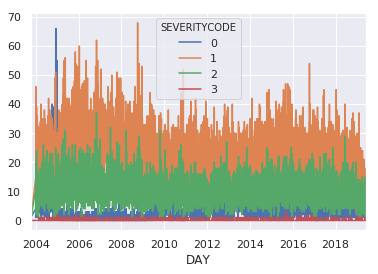

In [12]:
data_ts = data.groupby(['DAY', 'SEVERITYCODE']).size().unstack().fillna(0)
data_ts.plot()